In [1]:
!pip install pandas plotly matplotlib seaborn nbformat scikit-learn  pyarrow==14.0.2 --upgrade --quiet

  error: subprocess-exited-with-error
  
  × Building wheel for pyarrow (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> [358 lines of output]
      <string>:34: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
      C:\Users\DELL\AppData\Local\Temp\pip-build-env-x39ogsfb\overlay\Lib\site-packages\setuptools\_distutils\dist.py:289: UserWarning: Unknown distribution option: 'tests_require'
        warnings.warn(msg)
      C:\Users\DELL\AppData\Local\Temp\pip-build-env-x39ogsfb\overlay\Lib\site-packages\setuptools\_distutils\dist.py:289: UserWarning: Unknown distribution option: 'test_suite'
        warnings.warn(msg)
      C:\Users\DELL\AppData\Local\Temp\pip-build-env-x39ogsfb\overlay\Lib\site-packages\setuptools\dist.py:759: SetuptoolsDeprecationWarning: License classifiers are 

In [3]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression,SGDRegressor
from sklearn import preprocessing
from urllib.request import urlretrieve
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.io as pio
%matplotlib inline

pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',150)
sns.set_style('darkgrid')
matplotlib.rcParams['font.size']=14
matplotlib.rcParams['figure.figsize']=(10,6)
matplotlib.rcParams['figure.facecolor']='#00000000'

In [5]:
raw_df=pd.read_csv('weatherAUS.csv')
raw_df

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  \
0       2008-12-01   Albury     13.4     22.9       0.6          NaN   
1       2008-12-02   Albury      7.4     25.1       0.0          NaN   
2       2008-12-03   Albury     12.9     25.7       0.0          NaN   
3       2008-12-04   Albury      9.2     28.0       0.0          NaN   
4       2008-12-05   Albury     17.5     32.3       1.0          NaN   
...            ...      ...      ...      ...       ...          ...   
145455  2017-06-21    Uluru      2.8     23.4       0.0          NaN   
145456  2017-06-22    Uluru      3.6     25.3       0.0          NaN   
145457  2017-06-23    Uluru      5.4     26.9       0.0          NaN   
145458  2017-06-24    Uluru      7.8     27.0       0.0          NaN   
145459  2017-06-25    Uluru     14.9      NaN       0.0          NaN   

        Sunshine WindGustDir  WindGustSpeed WindDir9am WindDir3pm  \
0            NaN           W           44.0          W        WNW   
1            NaN         WNW           44.0        NNW        WSW   
2            NaN         WSW           46.0          W        WSW   
3            NaN          NE           24.0         SE          E   
4            NaN           W           41.0        ENE         NW   
...          ...         ...            ...        ...        ...   
145455       NaN           E           31.0         SE        ENE   
145456       NaN         NNW           22.0         SE          N   
145457       NaN           N           37.0         SE        WNW   
145458       NaN          SE           28.0        SSE          N   
145459       NaN         NaN            NaN        ESE        ESE   

        WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  \
0               20.0          24.0         71.0         22.0       1007.7   
1                4.0          22.0         44.0         25.0       1010.6   
2               19.0          26.0         38.0         30.0       1007.6   
3               11.0           9.0         45.0         16.0       1017.6   
4                7.0          20.0         82.0         33.0       1010.8   
...              ...           ...          ...          ...          ...   
145455          13.0          11.0         51.0         24.0       1024.6   
145456          13.0           9.0         56.0         21.0       1023.5   
145457           9.0           9.0         53.0         24.0       1021.0   
145458          13.0           7.0         51.0         24.0       1019.4   
145459          17.0          17.0         62.0         36.0       1020.2   

        Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm RainToday  \
0            1007.1       8.0       NaN     16.9     21.8        No   
1            1007.8       NaN       NaN     17.2     24.3        No   
2            1008.7       NaN       2.0     21.0     23.2        No   
3            1012.8       NaN       NaN     18.1     26.5        No   
4            1006.0       7.0       8.0     17.8     29.7        No   
...             ...       ...       ...      ...      ...       ...   
145455       1020.3       NaN       NaN     10.1     22.4        No   
145456       1019.1       NaN       NaN     10.9     24.5        No   
145457       1016.8       NaN       NaN     12.5     26.1        No   
145458       1016.5       3.0       2.0     15.1     26.0        No   
145459       1017.9       8.0       8.0     15.0     20.9        No   

       RainTomorrow  
0                No  
1                No  
2                No  
3                No  
4                No  
...             ...  
145455           No  
145456           No  
145457           No  
145458           No  
145459          NaN  

[145460 rows x 23 columns]

In [6]:
print(raw_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [7]:
raw_df.dropna(subset=['RainTomorrow'], inplace=True)
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 142193 entries, 0 to 145458
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           142193 non-null  object 
 1   Location       142193 non-null  object 
 2   MinTemp        141556 non-null  float64
 3   MaxTemp        141871 non-null  float64
 4   Rainfall       140787 non-null  float64
 5   Evaporation    81350 non-null   float64
 6   Sunshine       74377 non-null   float64
 7   WindGustDir    132863 non-null  object 
 8   WindGustSpeed  132923 non-null  float64
 9   WindDir9am     132180 non-null  object 
 10  WindDir3pm     138415 non-null  object 
 11  WindSpeed9am   140845 non-null  float64
 12  WindSpeed3pm   139563 non-null  float64
 13  Humidity9am    140419 non-null  float64
 14  Humidity3pm    138583 non-null  float64
 15  Pressure9am    128179 non-null  float64
 16  Pressure3pm    128212 non-null  float64
 17  Cloud9am       88536 non-null   fl

Text(0.5, 1.0, 'corelation matrix')

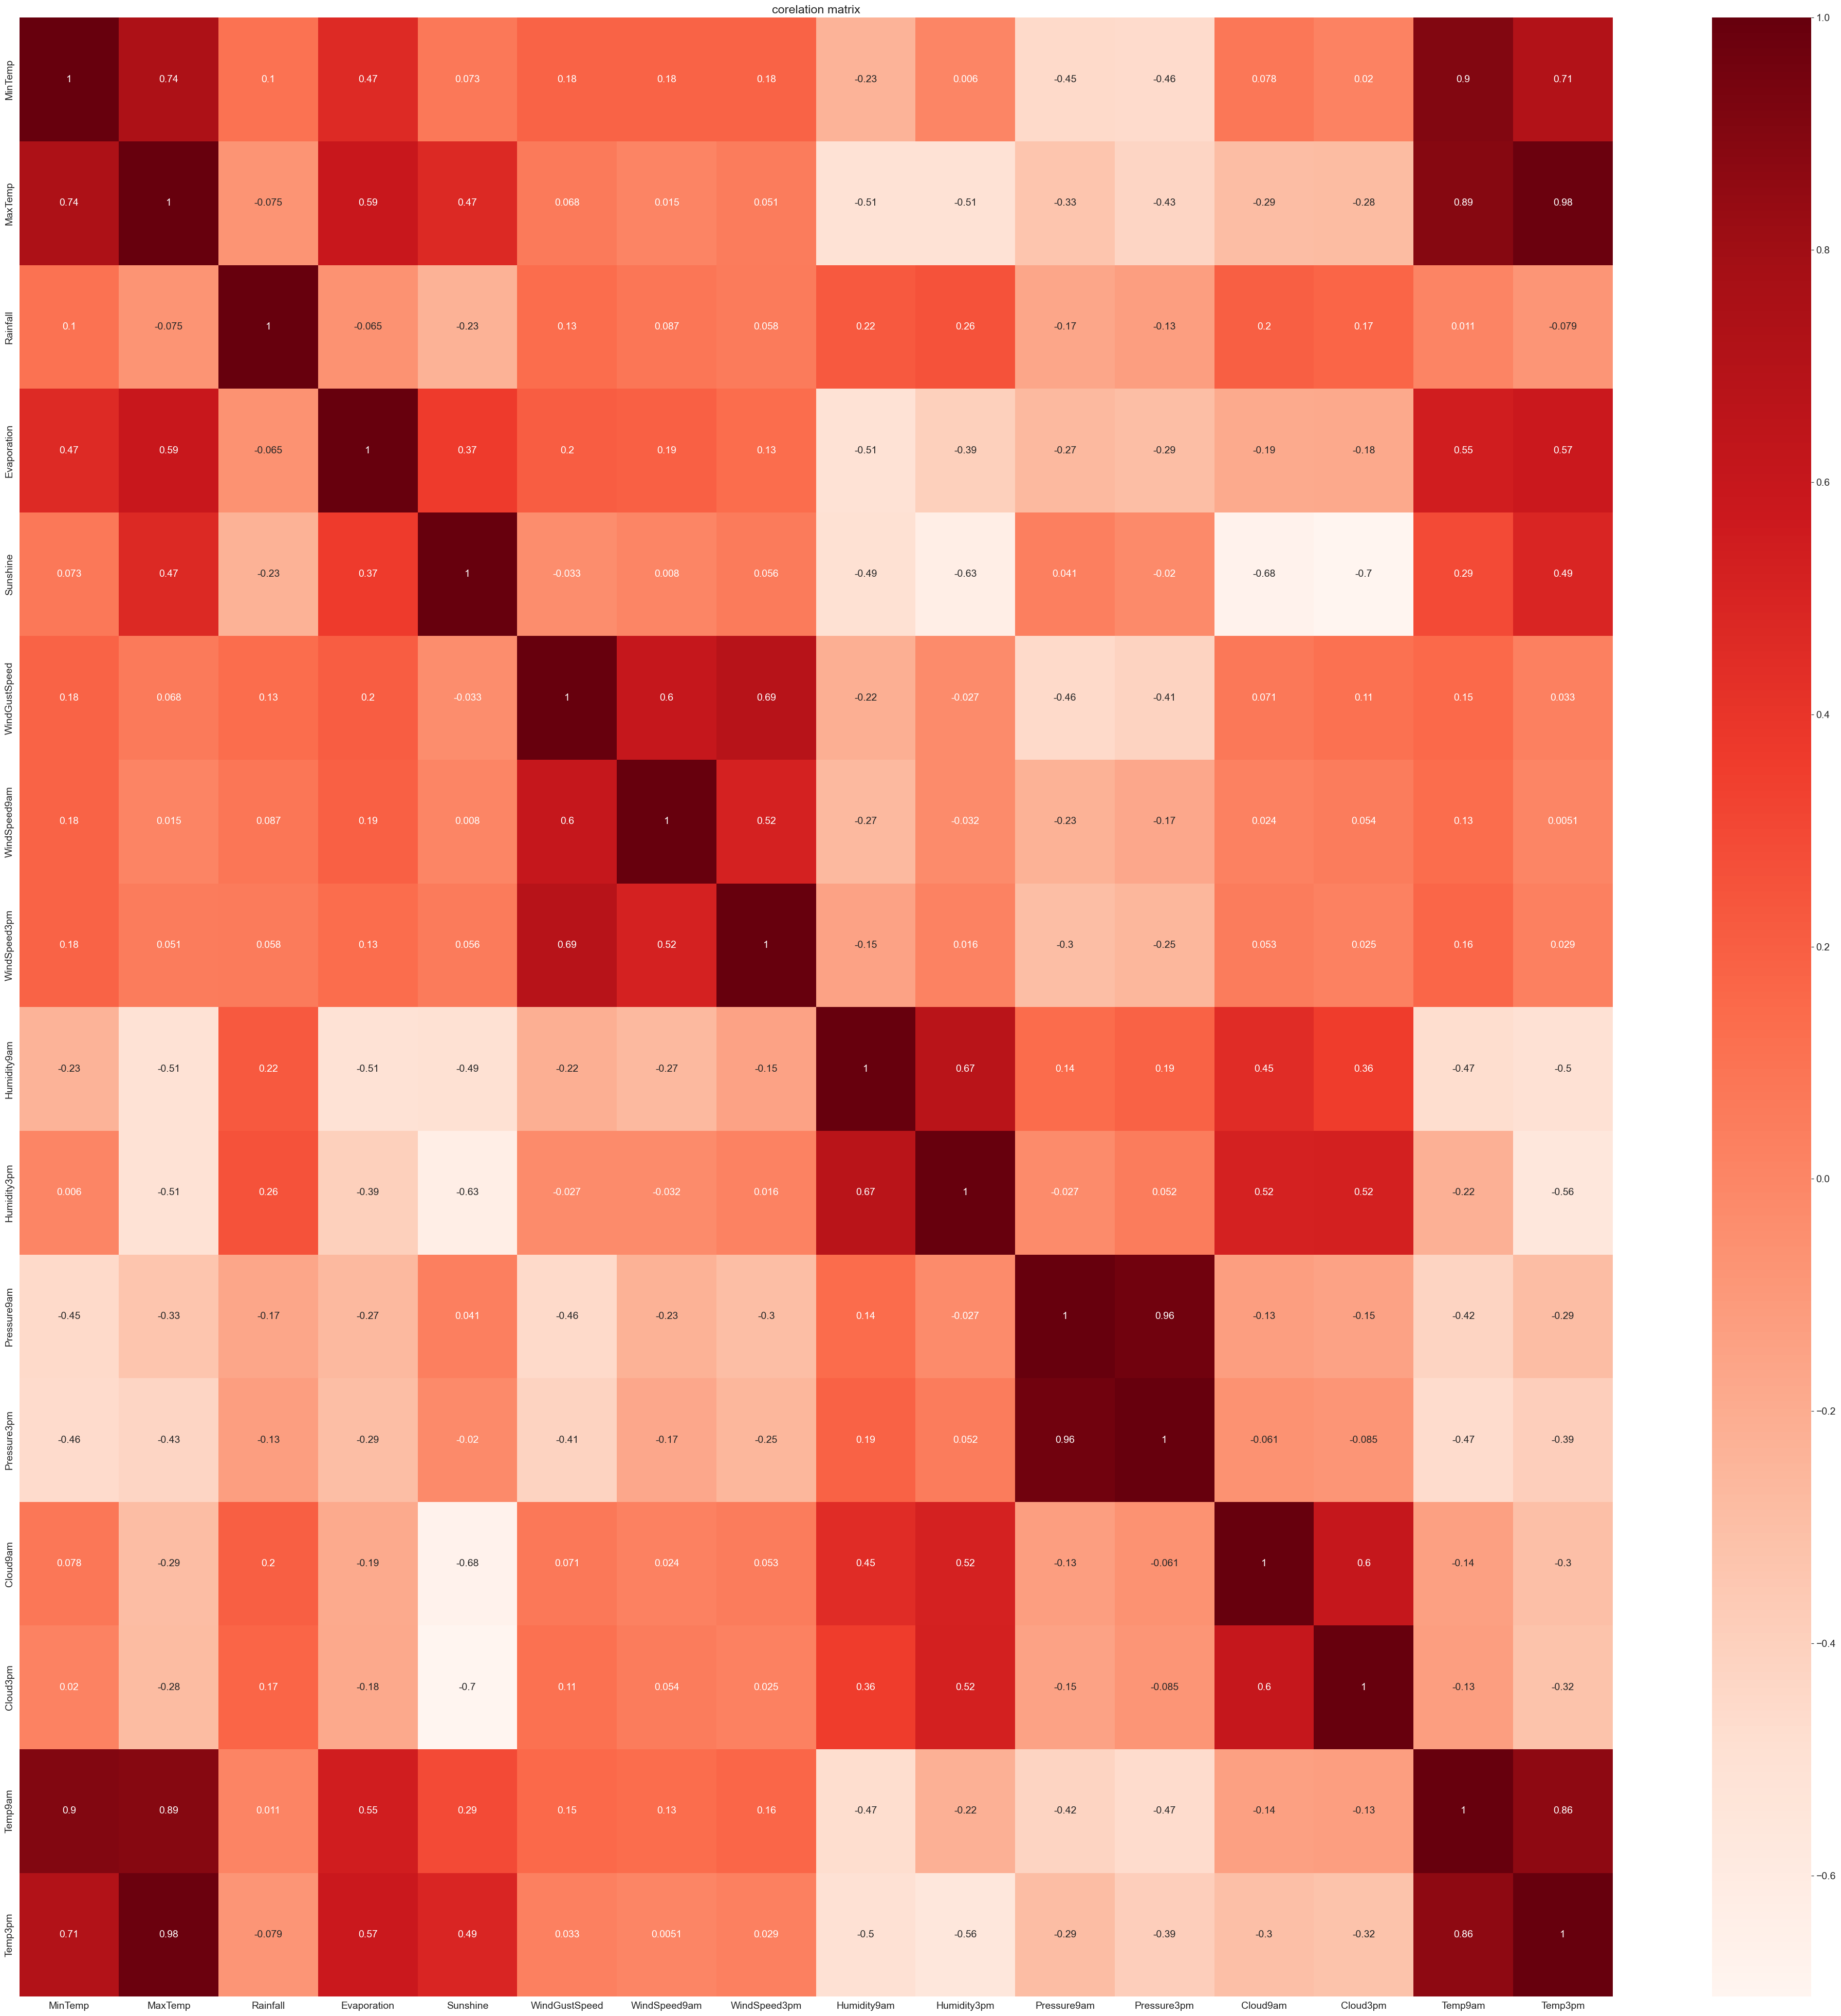

In [12]:
num_raw_df=raw_df.select_dtypes(include='number')
plt.figure(figsize=(50,50))
sns.heatmap(num_raw_df.corr(),cmap='Reds',annot=True)
plt.title('corelation matrix')

In [13]:
px.histogram(raw_df,x='Location',title='Locations VS Raining Days',color='RainToday')

In [14]:
px.histogram(raw_df,x='Temp3pm',title='Locations VS Raining Days',color='RainToday')

In [15]:
px.histogram(raw_df,x='RainTomorrow', color='RainToday', title="Rain today vs tomorrow")

In [16]:
px.scatter(raw_df.sample(2000),x='MinTemp',y='MaxTemp', color='RainToday', title='Max and Mintemp vs RainToday')

**preproccessing**

In [22]:
#Dividing complete data set into three parts for training,validation and testing
year=pd.to_datetime(raw_df.Date).dt.year
train_df,val_df,test_df=raw_df[year<2015], raw_df[year==2015], raw_df[year>2015]
print('train_df.shape: ',train_df.shape) 
print('val_df.shape: ',val_df.shape) 
print('test_df.shape: ',test_df.shape) 

train_df.shape:  (98988, 23)
val_df.shape:  (17231, 23)
test_df.shape:  (25974, 23)


In [21]:
#identify inputs and target columns in dataset
input_cols=list(raw_df.columns)[1:-1]
target_cols='RainTomorrow'

In [24]:
train_inputs=train_df[input_cols].copy()
val_inputs=val_df[input_cols].copy()
test_inputs=test_df[input_cols].copy()

train_targets=train_df[target_cols].copy()
val_targets=val_df[target_cols].copy()
test_targets=test_df[target_cols].copy()


In [25]:
print('train_inputs.shape: ',train_inputs.shape) 
print('val_inputs.shape: ',val_inputs.shape) 
print('test_inputs.shape: ',test_inputs.shape)
print('train_targets.shape: ',train_targets.shape) 
print('val_targets.shape: ',val_targets.shape) 
print('test_targets.shape: ',test_targets.shape) 

train_inputs.shape:  (98988, 21)
val_inputs.shape:  (17231, 21)
test_inputs.shape:  (25974, 21)
train_targets.shape:  (98988,)
val_targets.shape:  (17231,)
test_targets.shape:  (25974,)
